<b><font color="red" size="6"> ch13.데이터 시각화  </font></b>

# 1절. 시각화 개요
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능을 추가한 라이브러리

# 2절. matplotlib
- https://pypi.org/project/matplotlib/ : matplotlib doc
- https://matplotlib.org/stable/api/index.html : api reference

## 2.1 패키지 import 및 기본설정
라이스타일 : '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [3]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt 

In [4]:
# % 주피터노트북에서 사용가능한 매직명령어
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='ignore') # 경고메세지 안보이게
warnings.filterwarnings(action='default') # 경고메세지 보이게

import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import seaborn as sns

## 2.2 그래프 그리기
- matplotlib으로 그래프를 그리기 위한 단계 
    1) 데이터 준비<br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장 <br>

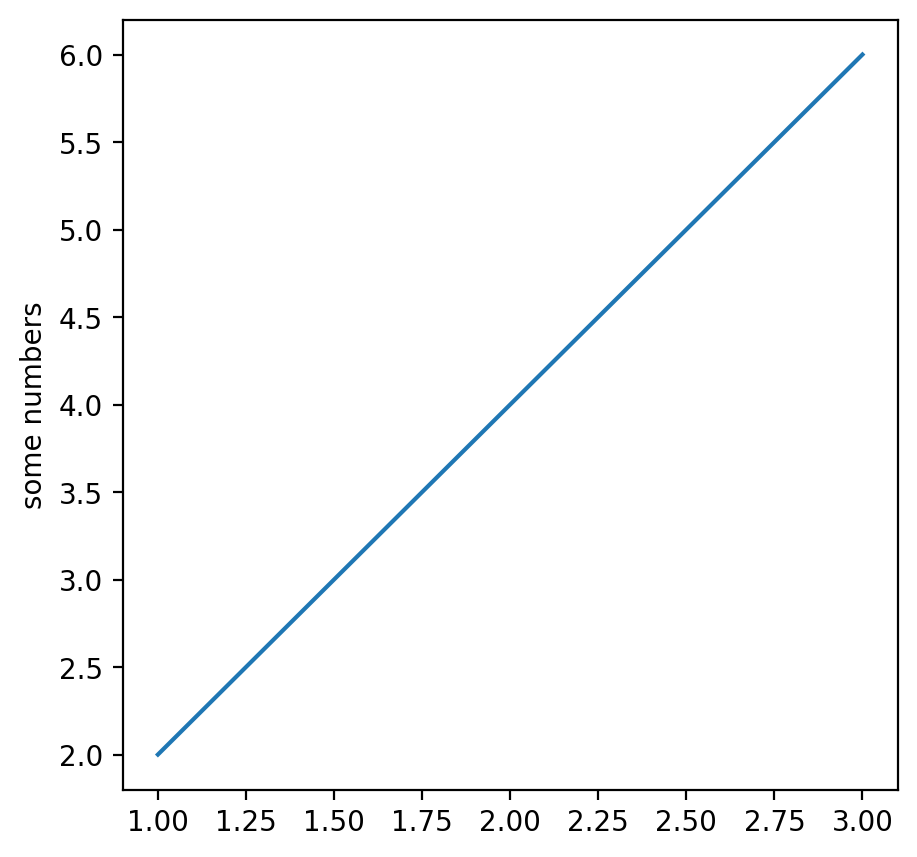

In [5]:
plt.figure(figsize=(5,5)) # 2) 그래프 객체 생성. 사이즈는 인치
plt.plot([1,2,3],[2,4,6]) # 3) 그래프 함수 / y값이 동일하면 y값 생략가능
plt.ylabel('some numbers') # 4) 그래프 커스터마이징
plt.show() # 5) 그래프 출력

## 2.3 그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

In [6]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

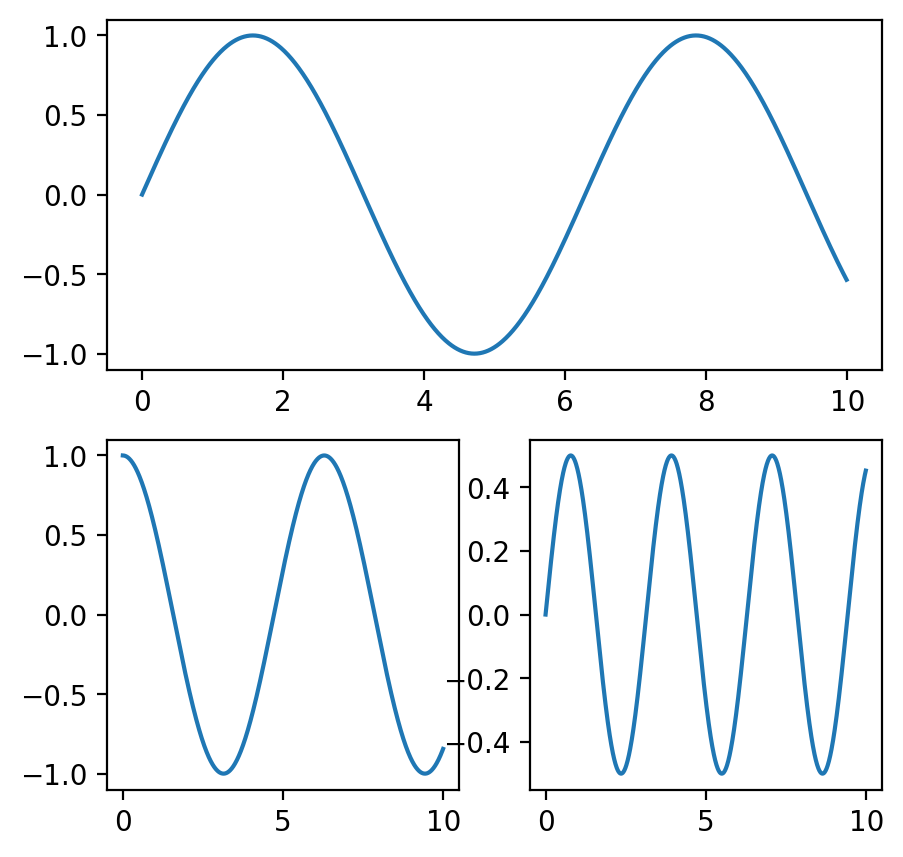

In [7]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행 1열의 subplot에서 1번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행 2열의 subplot에서 3번째 subplot에 다음과 같이 그래프 그릴거야
# plt.subplot(223) 위와 같은 코드
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4) # 2행 2열의 subplot에서 4번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots() 함수로 서브플롯 추가
- plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085

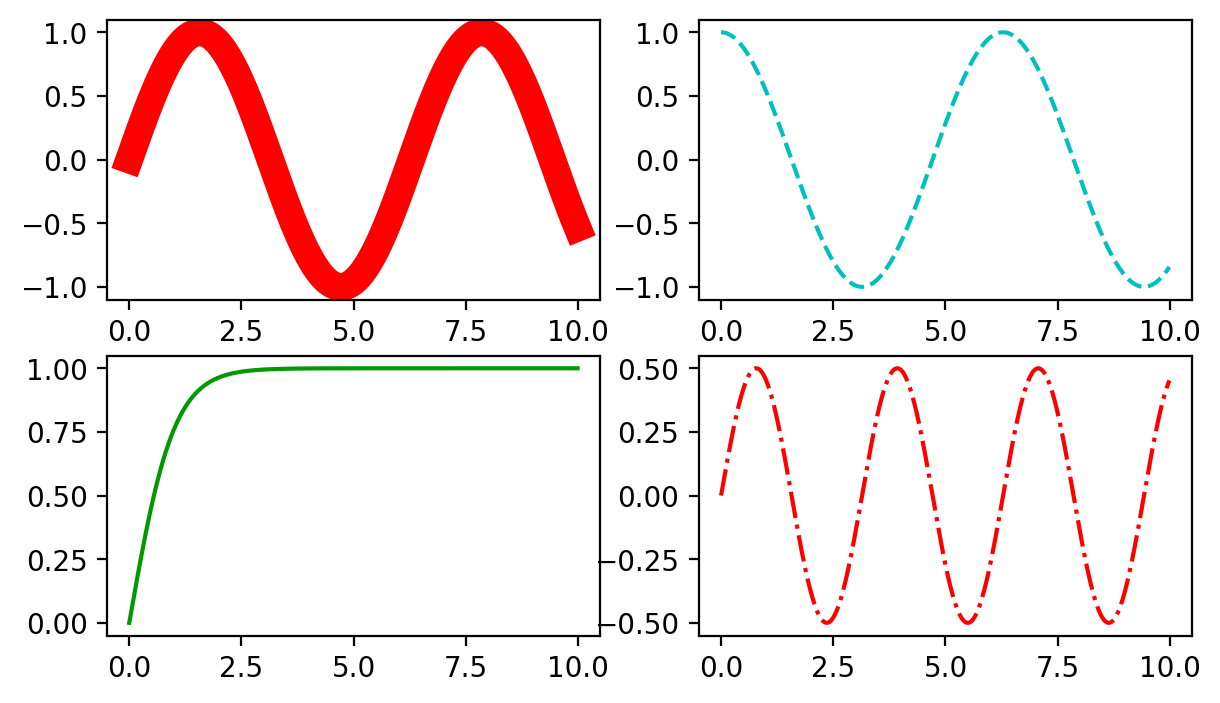

In [8]:
# 2행 2열 서브플롯
fig, axes =plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # color='c', linestyle='--' (대시라인) : (점선)
axes[1,0].plot(x, np.tanh(x), color='#009900') # rgb값으로 넣어도 사용 가능
# axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') # k=black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')

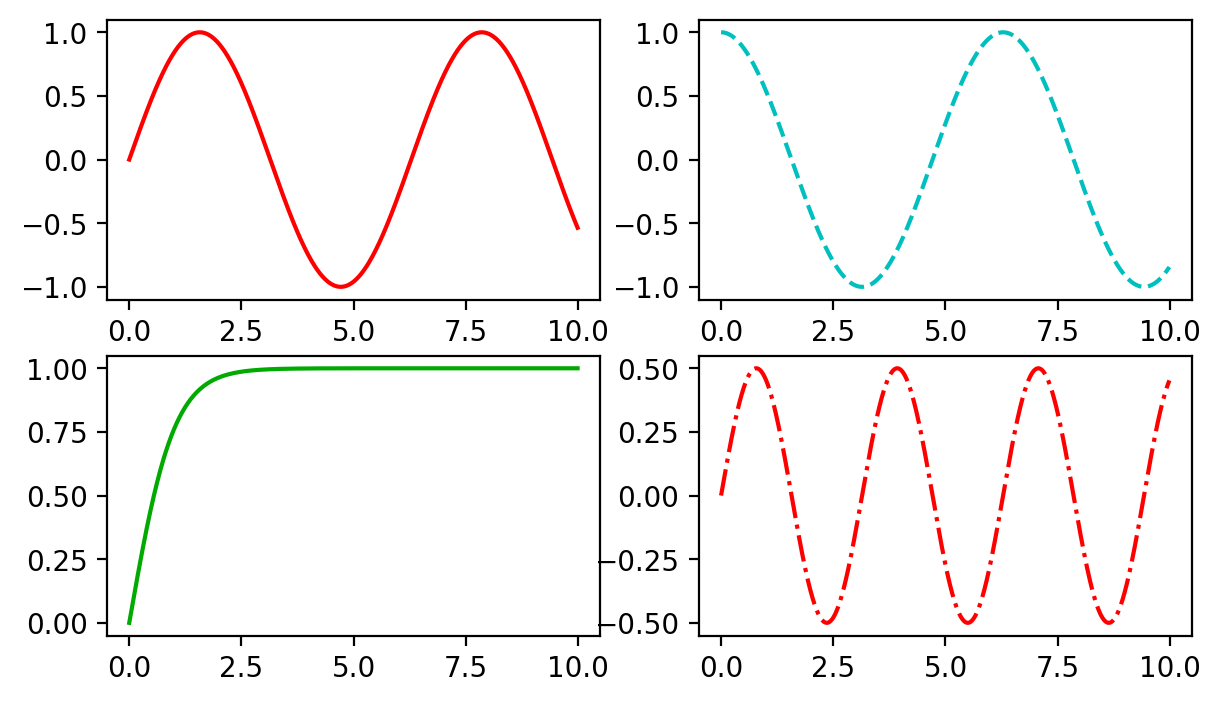

In [9]:
# 2행 2열 subplots (for문 사용)
func_list = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt_list = ['r','c--','#00AA00','r-.']
fig, axes = plt.subplots(2,2, figsize=(7,4))
# list(enumerate(axes.flat))
for idx, ax in enumerate(axes.flat):
    ax.plot(x, func_list[idx](x), fmt_list[idx])

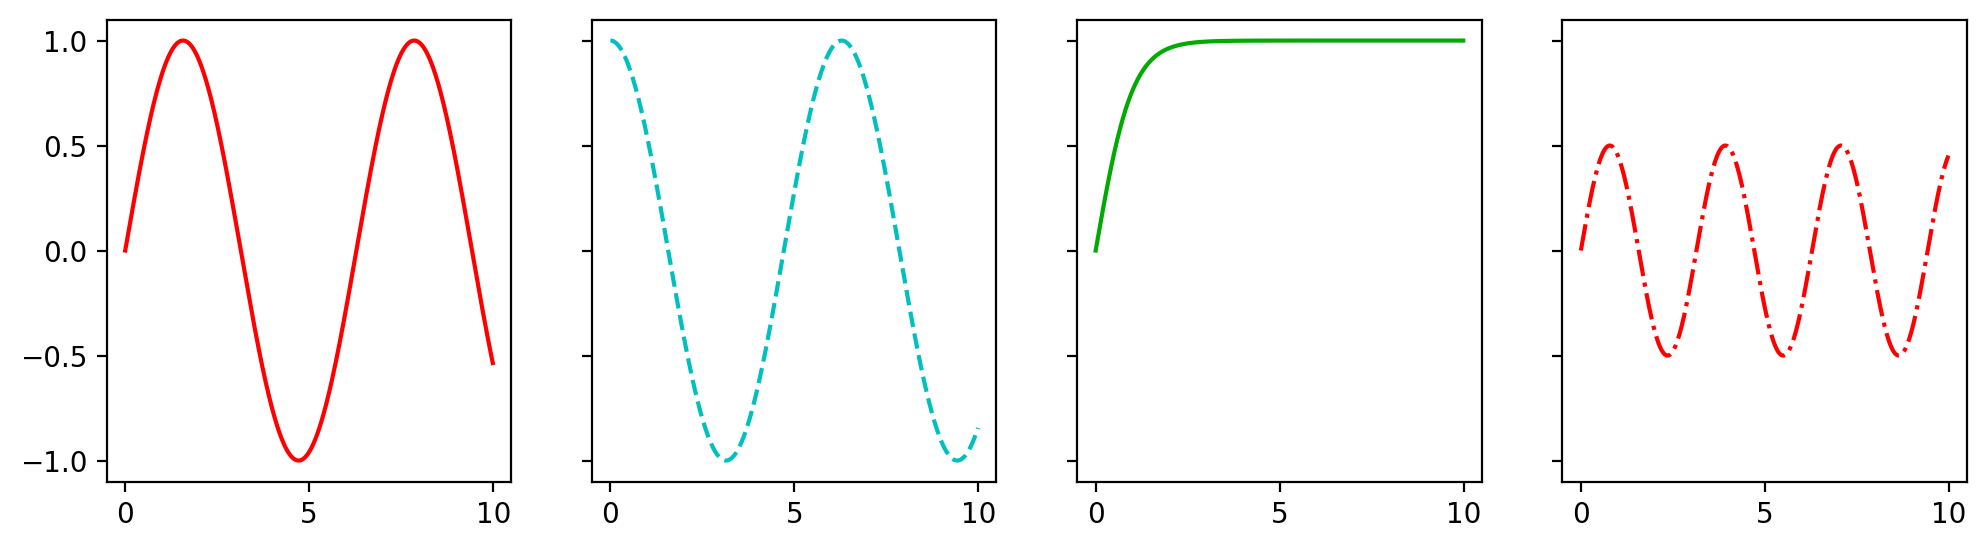

In [10]:
# 1행 4열 서브플롯
fig, axes = plt.subplots(ncols=4, figsize=(12,3), sharey=True)  # y축 공유
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

## 2.4 다양한 그래프 그리기
### 1) pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() : 선그래프


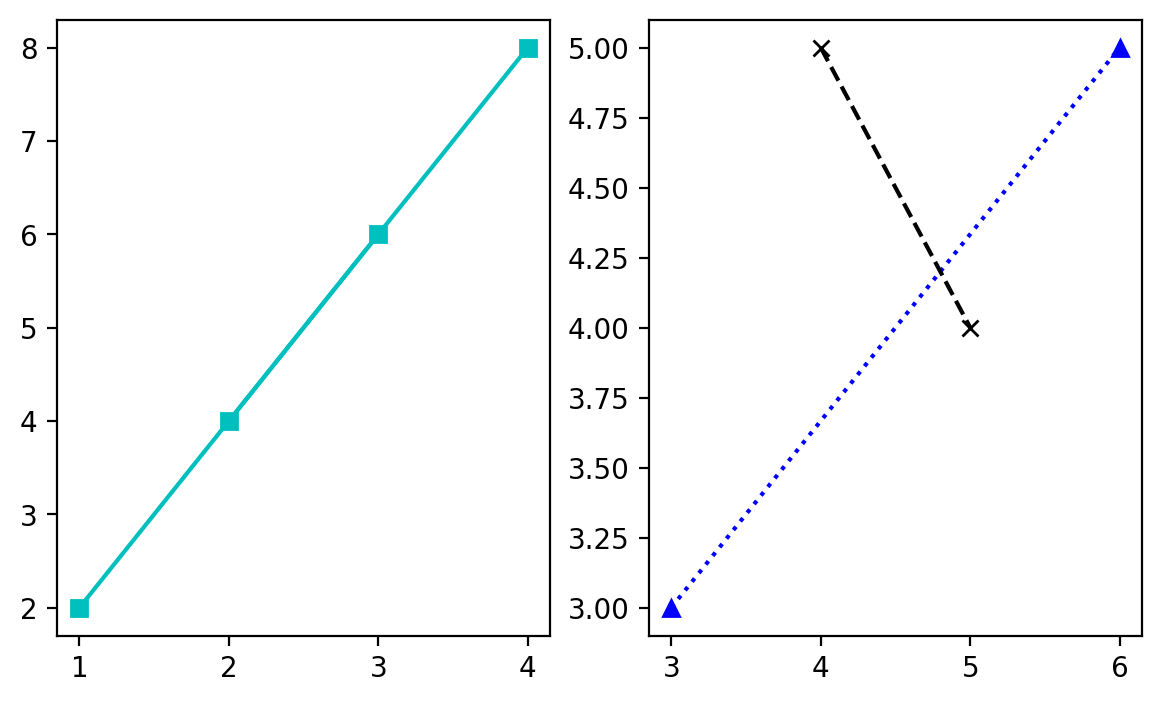

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(7,4)) # 1행 2열
axes[0].plot([[1, 2],[3, 4]],
             [[2, 4],[6, 8]], 'cs-') # color='c': cyan , marker='s':사각마커, linestyle='-' : 실선
axes[1].plot([3,6],[3,5], 'b^:') # b(blue), ^(마커) :(점선)
axes[1].plot([4,5],[5,4], 'kx--') # k(black), x(마커), --(대시드점선)

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt) <br>
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None, xlim, ylim,.....)<br>
    * kind : line(기본값), scatter(점도표), bar, barh, density, pie ... <br>
    * figsize : tuple(인치단위)<br>
    * xlim, ylim : list/tuple

In [12]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
29,4.7,3.2,1.6,0.2,setosa


#### https://stackoverflow.com/questions/30490740/move-legendoutside-figure-in-seaborn-tsplot : 범례사용

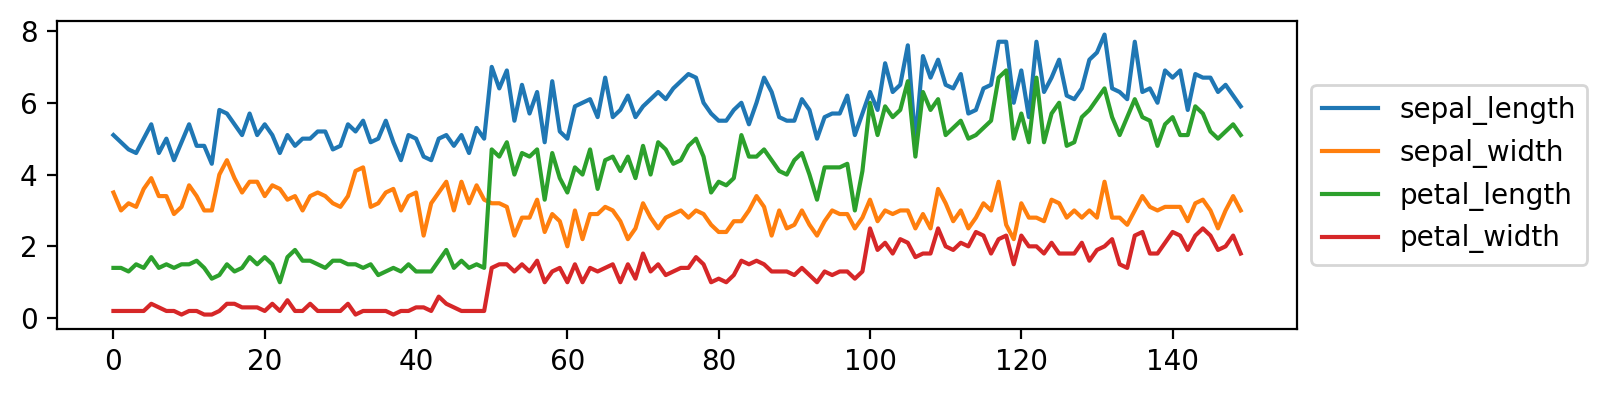

In [13]:
g = iris.plot(figsize=(8,2))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### colormap 색상
https://ko.wikipedia.org/wiki/상자_수염_그림 <br>
https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)


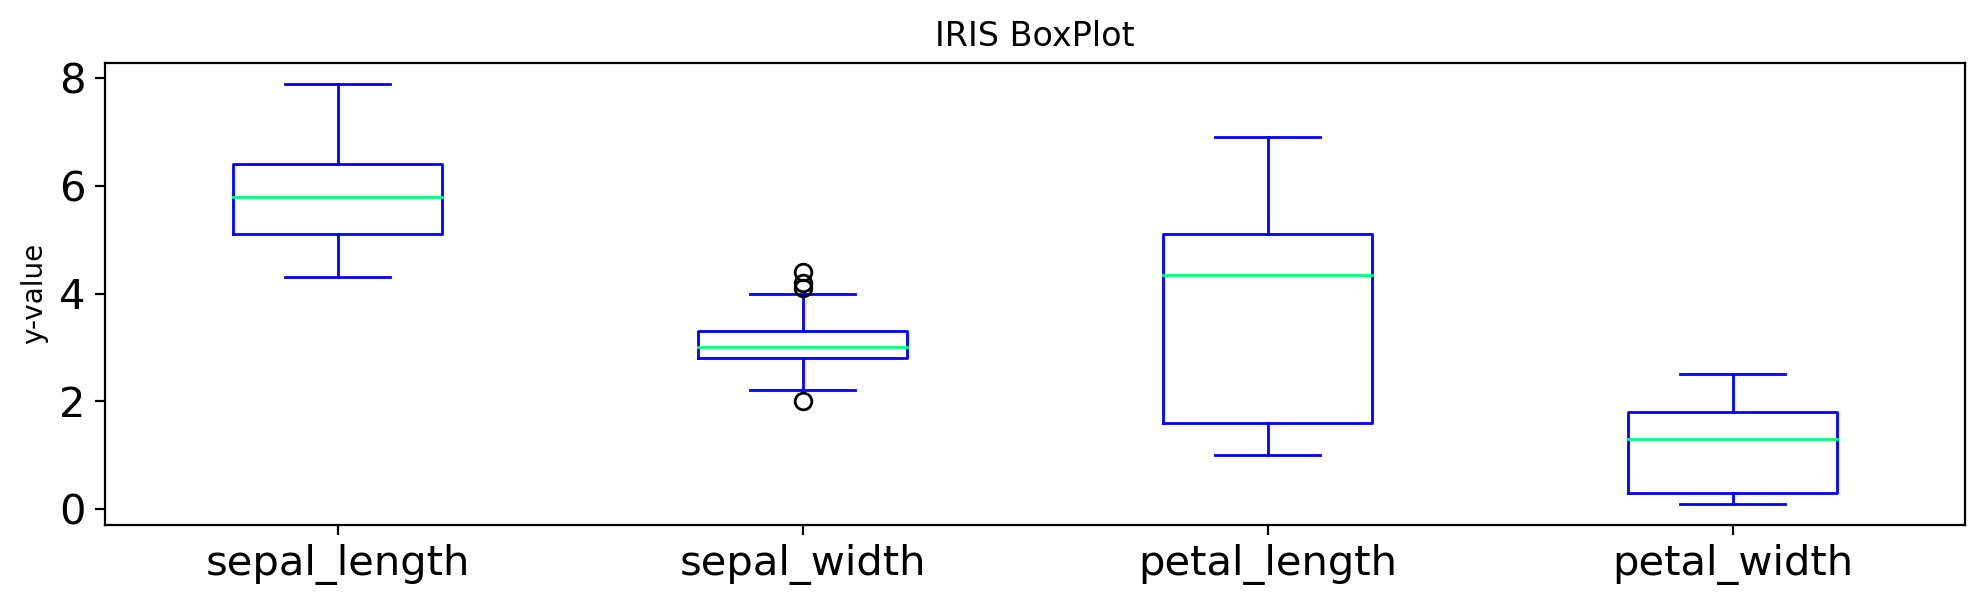

In [14]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot', ylabel='y-value', fontsize=15, colormap='winter')
plt.show()

In [15]:
iris.quantile(q=[0, 0.25, 0.5, 0.75, 1])

C:\Users\201-23\AppData\Local\Temp\ipykernel_7704\497938153.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.quantile(q=[0, 0.25, 0.5, 0.75, 1])


,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [16]:
iris.corr()

C:\Users\201-23\AppData\Local\Temp\ipykernel_7704\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


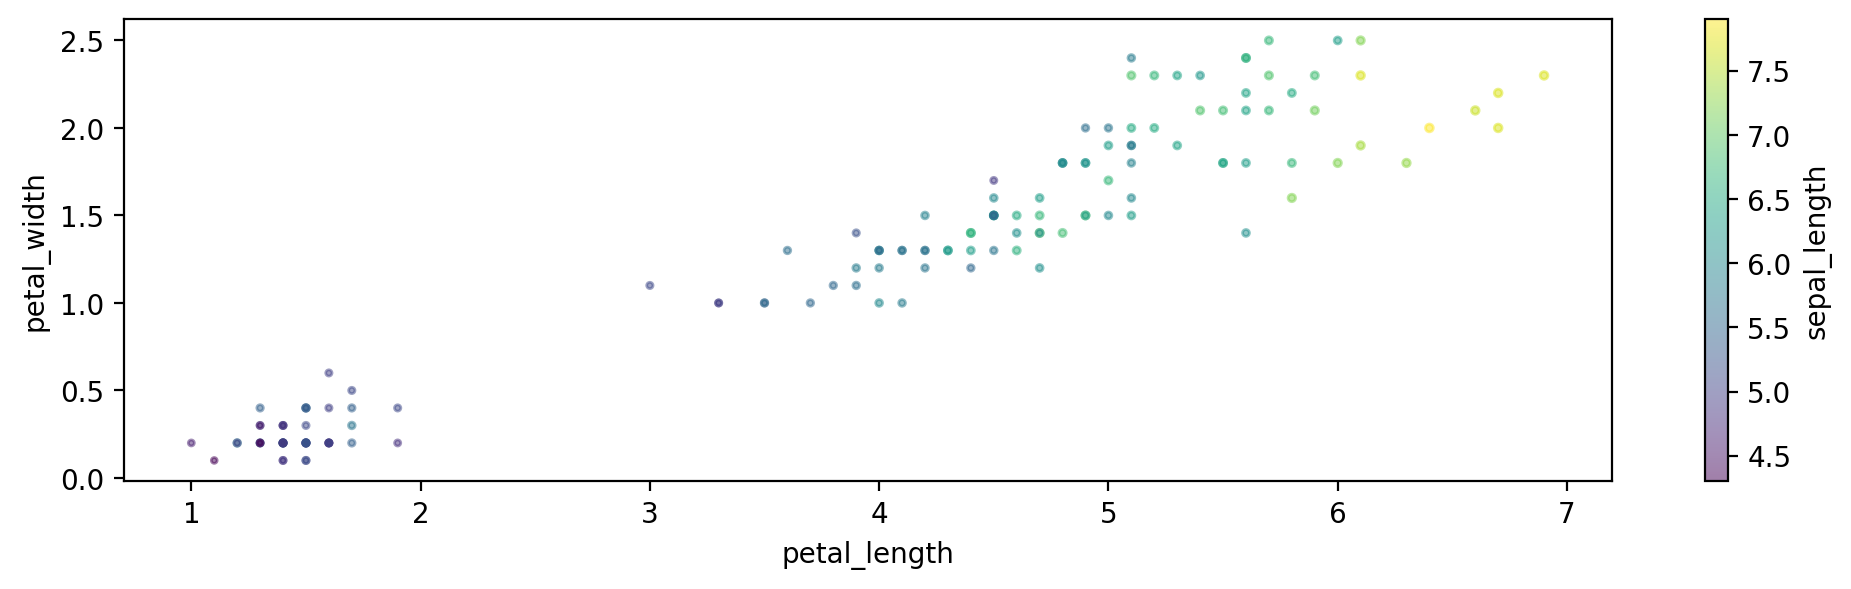

In [17]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3), s='sepal_length', # s:점의크기 c:색상
         c='sepal_length',
         alpha=.5) # alpha : 투명도 
plt.show()

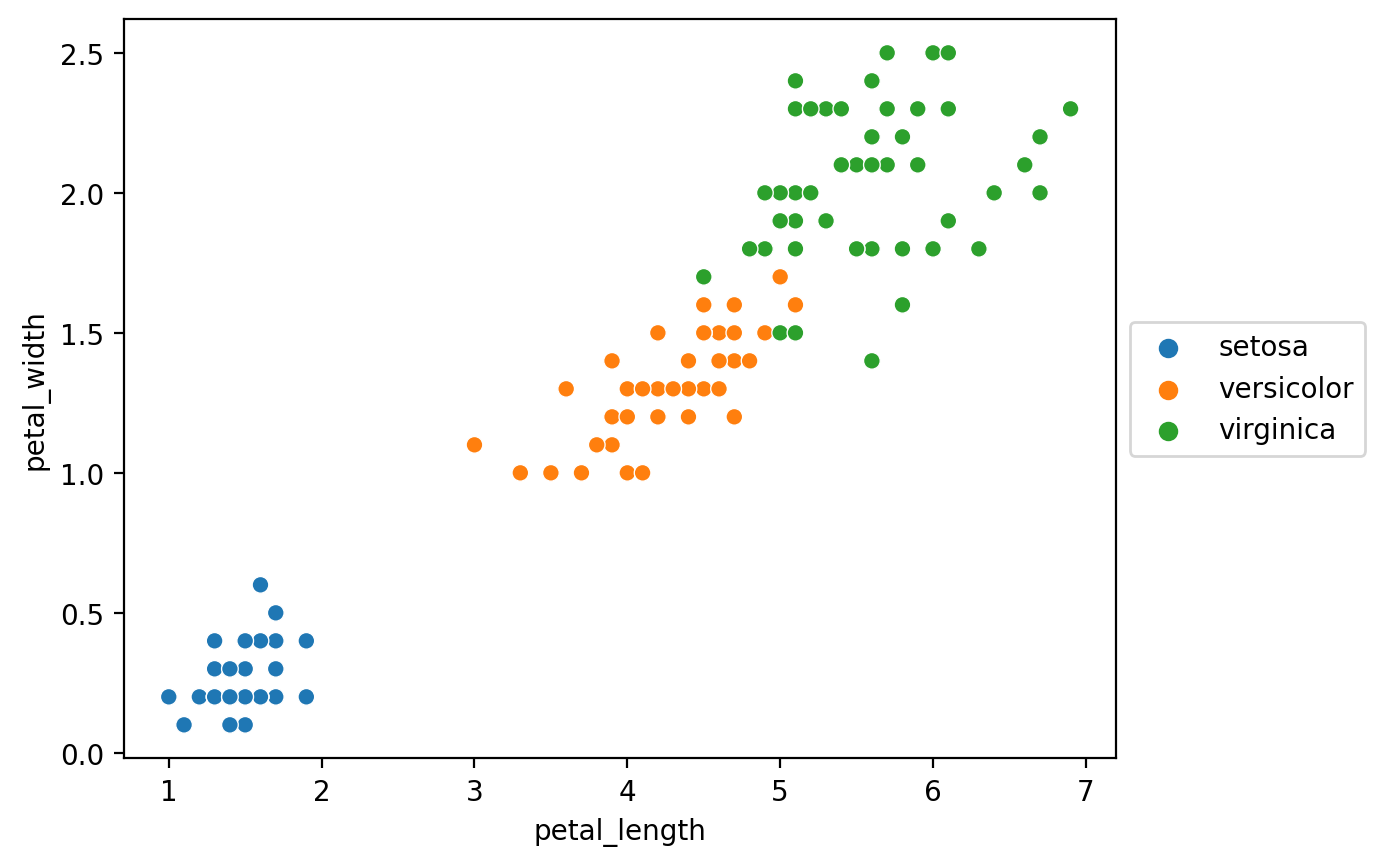

In [18]:
import seaborn as sns
g = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"
versicolor,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"
virginica,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"


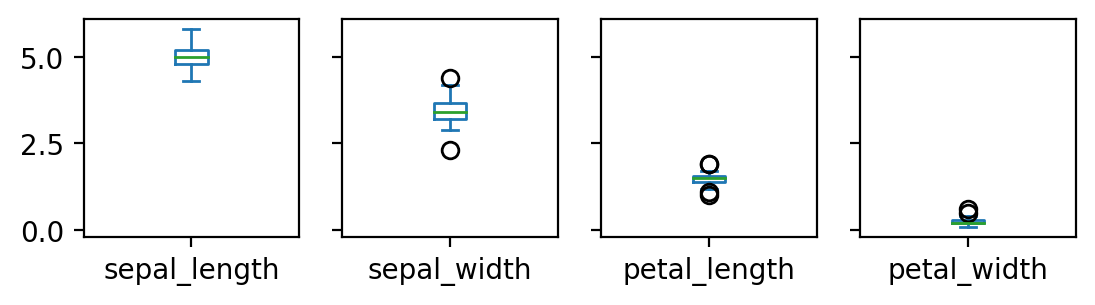

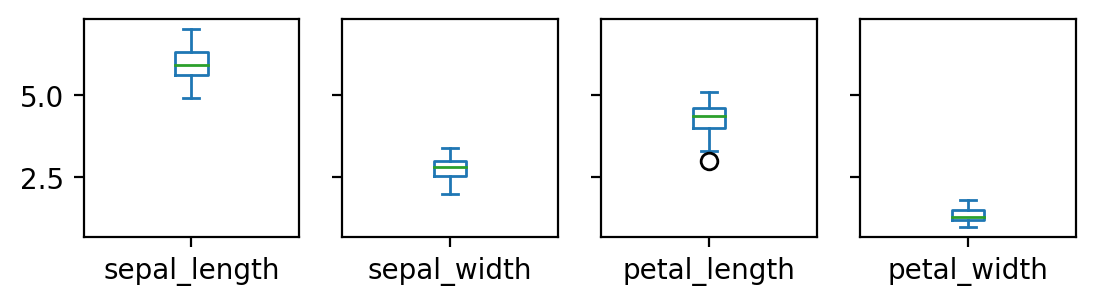

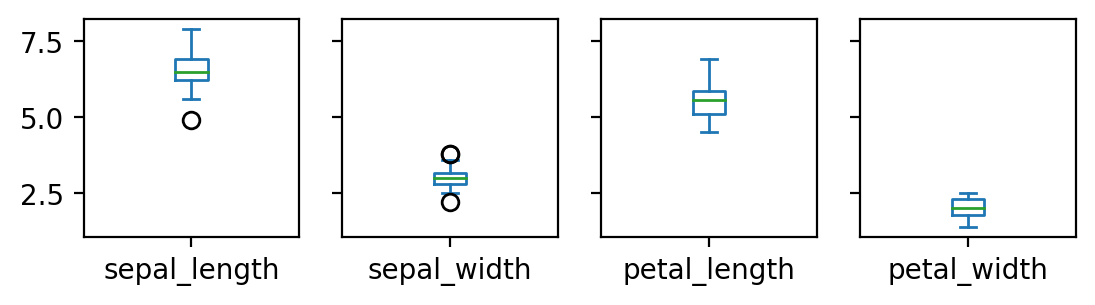

In [19]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', subplots=True, layout=(3, 4), sharey=True) #  sharey=True y축 공유

## 4) plt.scatter(): 산점도

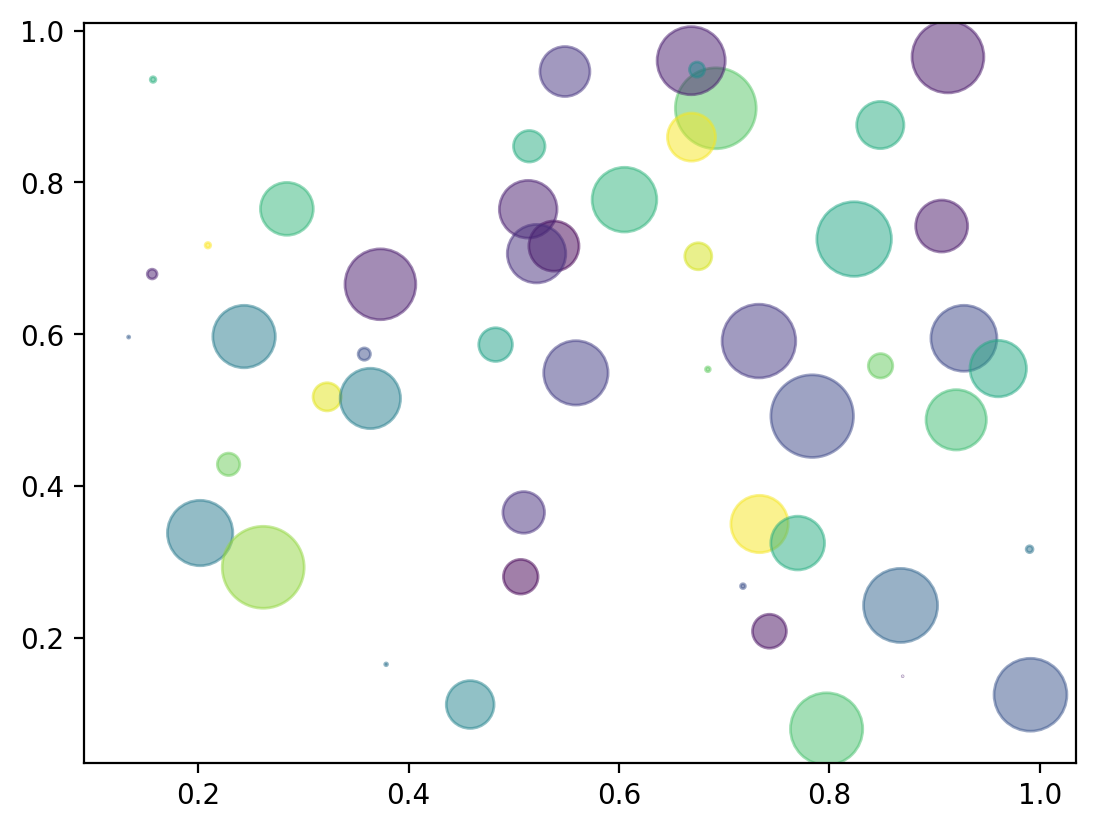

In [20]:
x = np.random.rand(50) # 균등분표의 1차원 난수 50개 발생(배열)
y = np.random.rand(50) 
colors = np.random.rand(50)
area = (np.random.rand(50)*30)**2
plt.scatter(x, y, s=area, # 점의크기
          c=colors,
           alpha=.5 # 투명도(투명0~1불투명)
           )
plt.show()

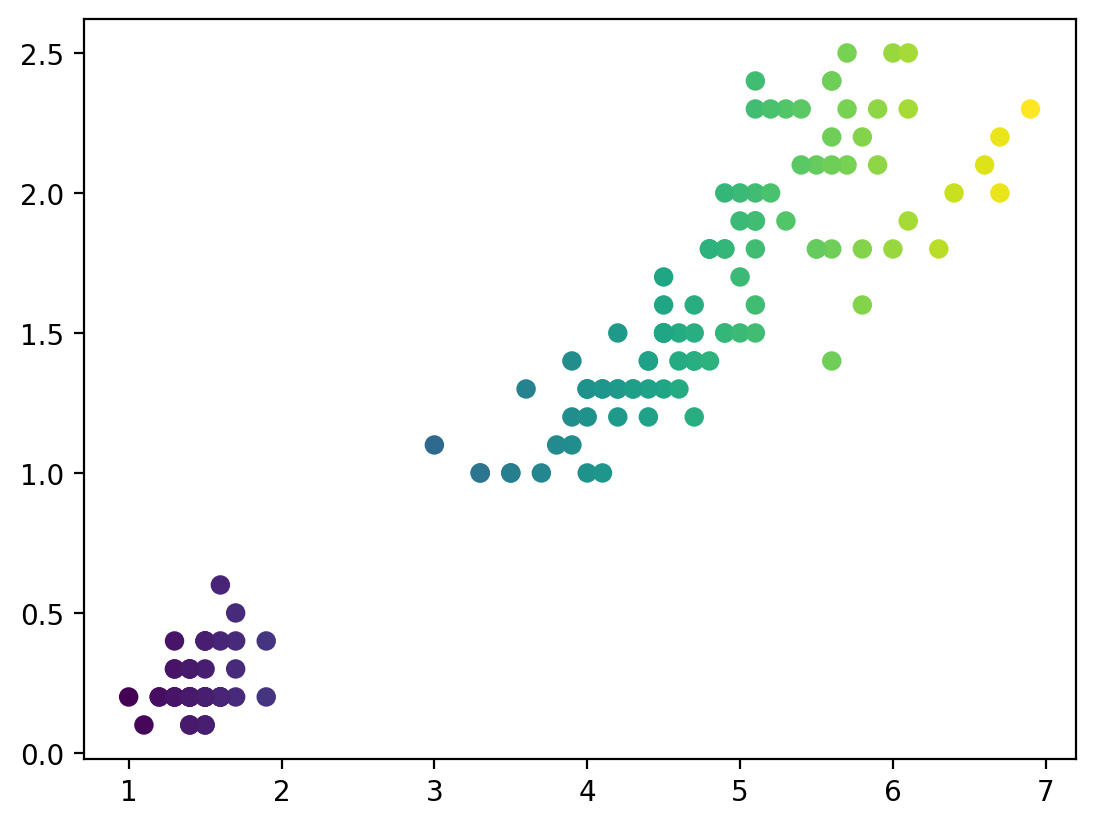

In [21]:
plt.scatter(x=iris.petal_length, y=iris.petal_width, c=iris.petal_length*20)
plt.show()

## 2.5 그외 그래프 그리기
### 1) fill(), fill_between(), scatter()
### 2) bar(), barh(), axvline(), axhline()
### 3) hist(히스토그램), boxplot(분포를 모름), violinplot()

In [1]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격으로 50(기본값)개 수 추출
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,4))
axes[0,0].scatter(x, y, s=5, marker='v')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,0].plot([0,2],[-1, 1], 'k')
axes[1,1].axvline(0.5)
axes[1,1].axhline(0.8, c='r', linestyle='--')

NameError: name 'np' is not defined

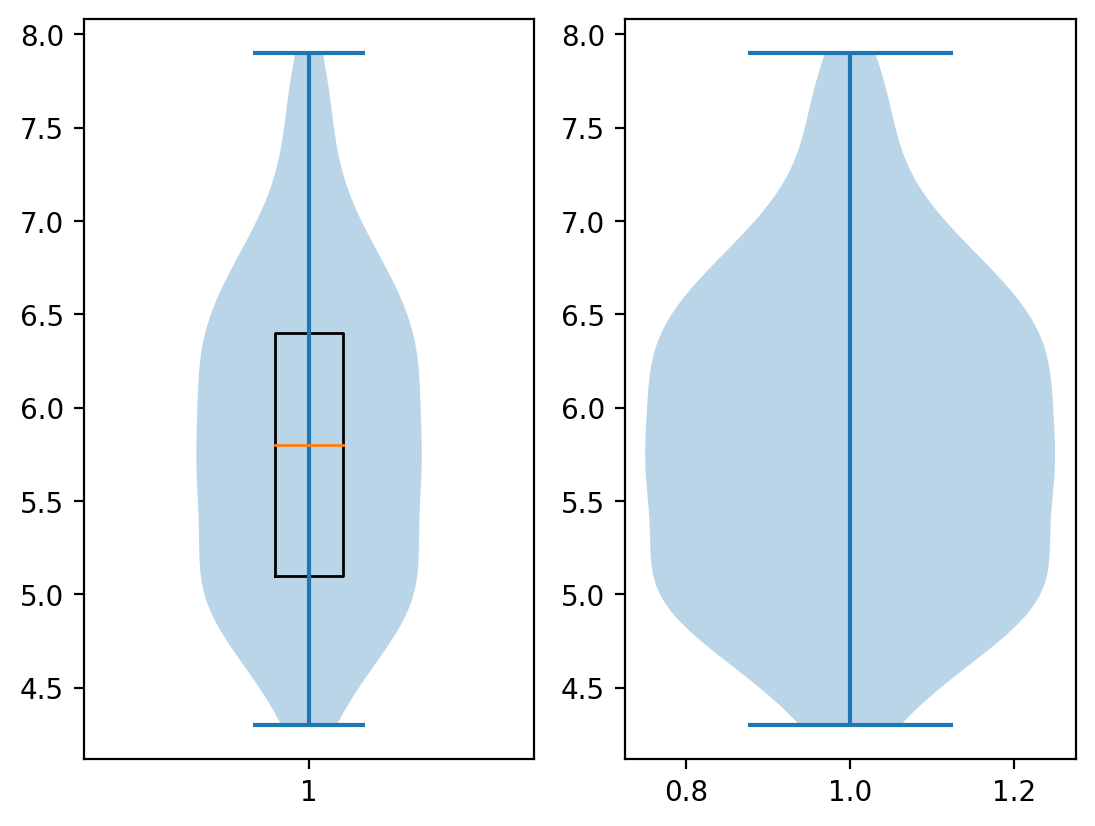

In [23]:
# boxplot vs violinplot
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length) # 분포까지 알수있음 
axes[1].violinplot(iris.sepal_length) 
plt.show()

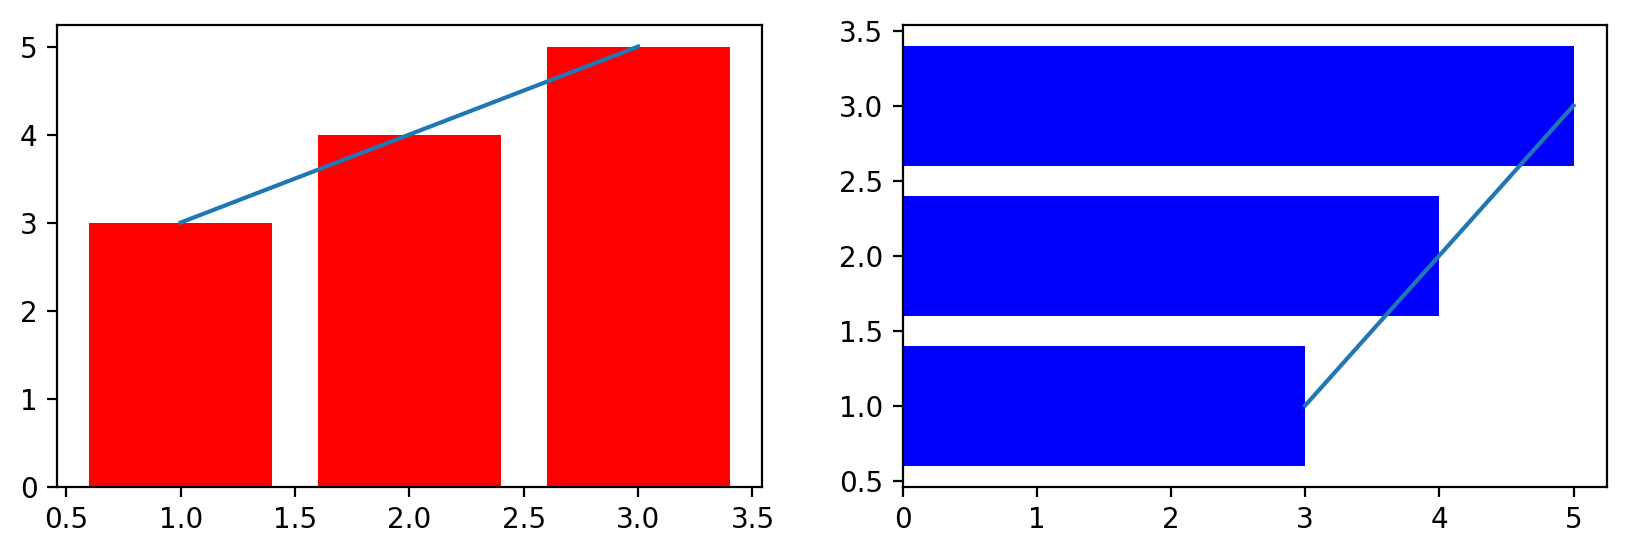

In [29]:
# bar, barh
x = [1,2,3]
y = [3,4,5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3)) # 1행 2열 
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color='b')
axes[1].plot(y, x)

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x269619d4dc0>])

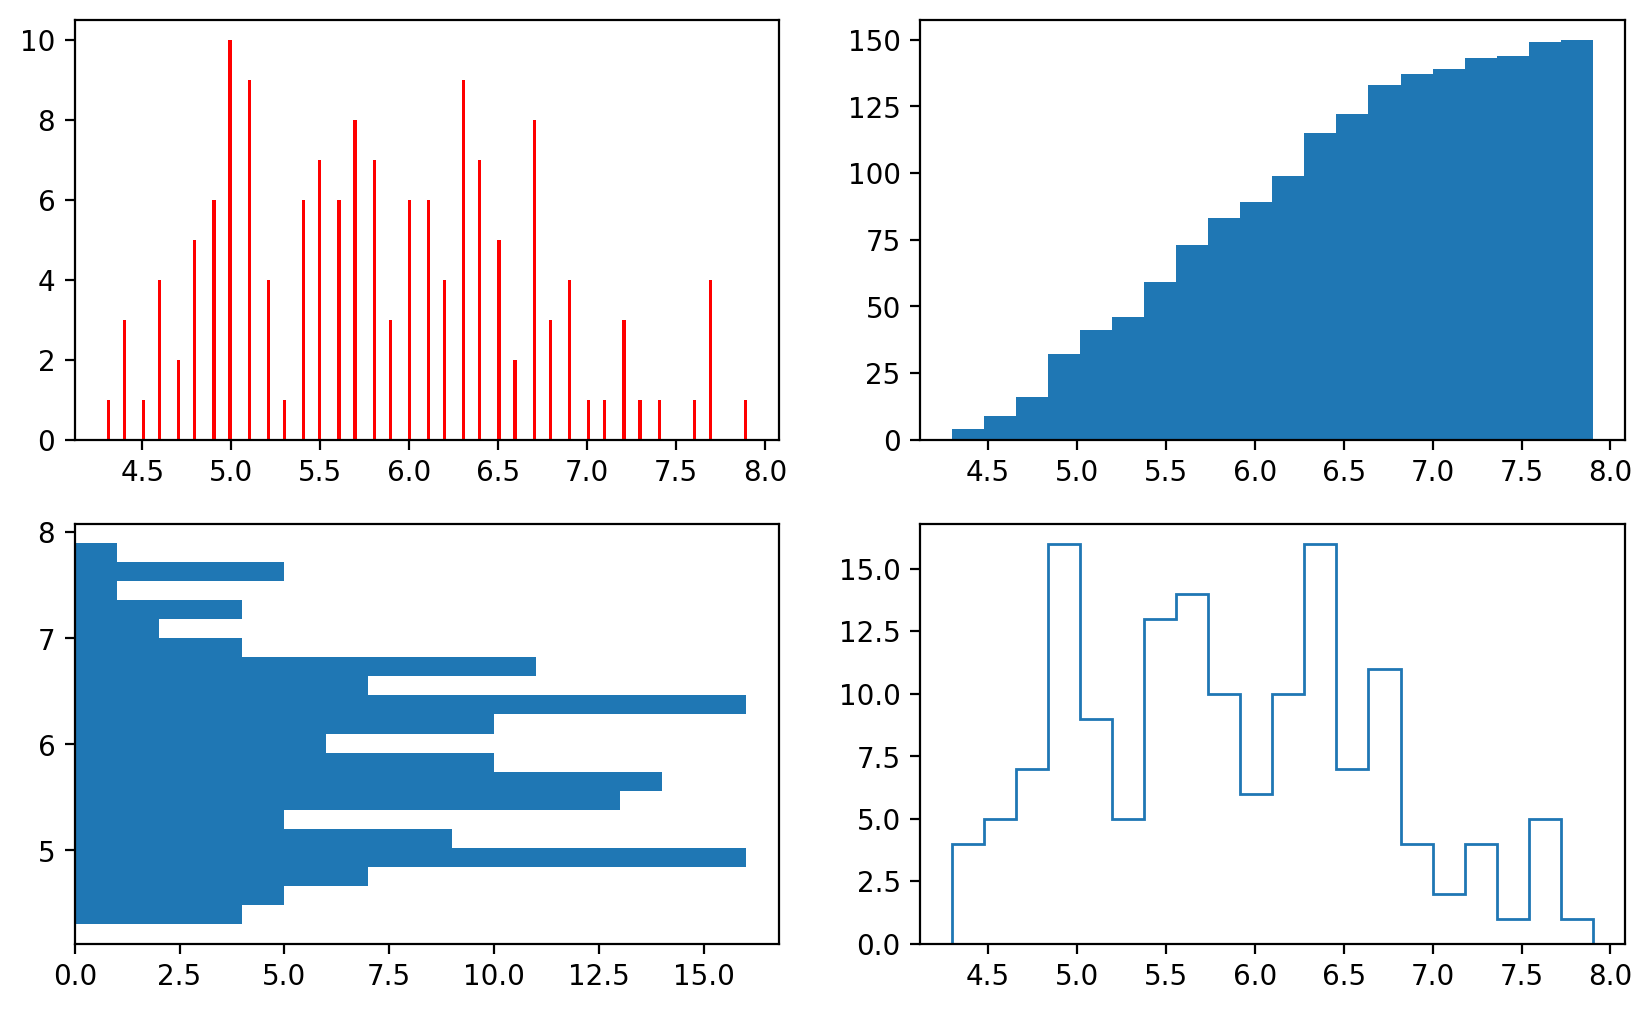

In [48]:
# hist - 히스토그램(도수분포표를 그래프화)
import seaborn as sns
iris = sns.load_dataset('iris')
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0,0].hist(iris.sepal_length, bins=200, color='r') # bins 숫자가 오르면 너비가 쫍아짐
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평 히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step') 

## 2.6 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker...
### 2) text(), annotate()
https://matplotlib.org/api/axes_api.html#text-and-annotations


In [74]:
# 한글 기본 폰트 설정 방법1
# plt.rcParams['font.family'] = '~'를 바꿈
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# plt.rc('font', family='Applecothic') # mac
# plt.rcParams['font.family']='Malgun Gothic'

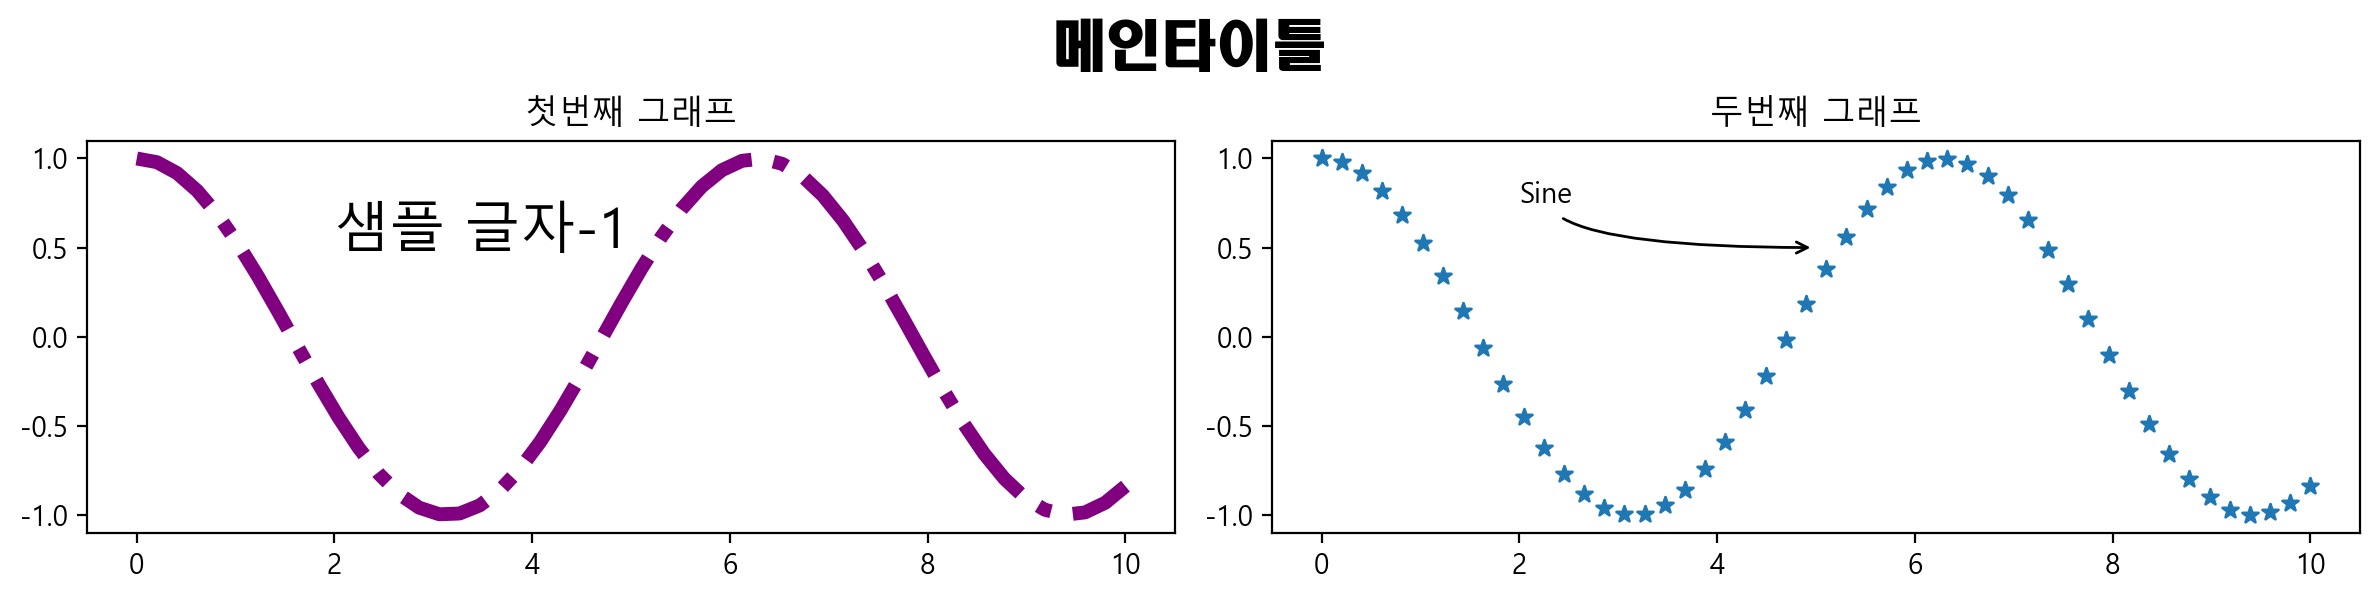

In [106]:
# 한글 특정 폰트 설정 방법
from matplotlib.font_manager import FontProperties
font_path = r'C:\Windows\Fonts\HMKMRHD.TTF'
font_prop = FontProperties(fname=font_path, size=20)


import numpy as np
x = np.linspace(0, 10) # 기본값 50
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(x, y, linewidth=5, linestyle='-.', color='purple')
axes[0].text(2, 0.5, '샘플 글자-1', style='italic', fontsize=20,)
axes[0].set_title('첫번째 그래프')

axes[1].scatter(x, y, marker='*')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자가 있을 좌표 위치
                xy = (5, 0.5), # 화살표 가르킬 좌표 위치
                arrowprops= dict(arrowstyle='->', # 화살표 모양 
                             connectionstyle='angle3') # angle, angle3, arc,.....
            )
axes[1].set_title('두번째 그래프')
# 레이아웃이 자동 조정
# rect = [left(0), bottom(0), right(1), top(1)] 각 경계의 상대적 비율
plt.tight_layout(rect = [0, 0, 1, 0.9])

plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호 : https://matplotlib.org/users/mathtext.html

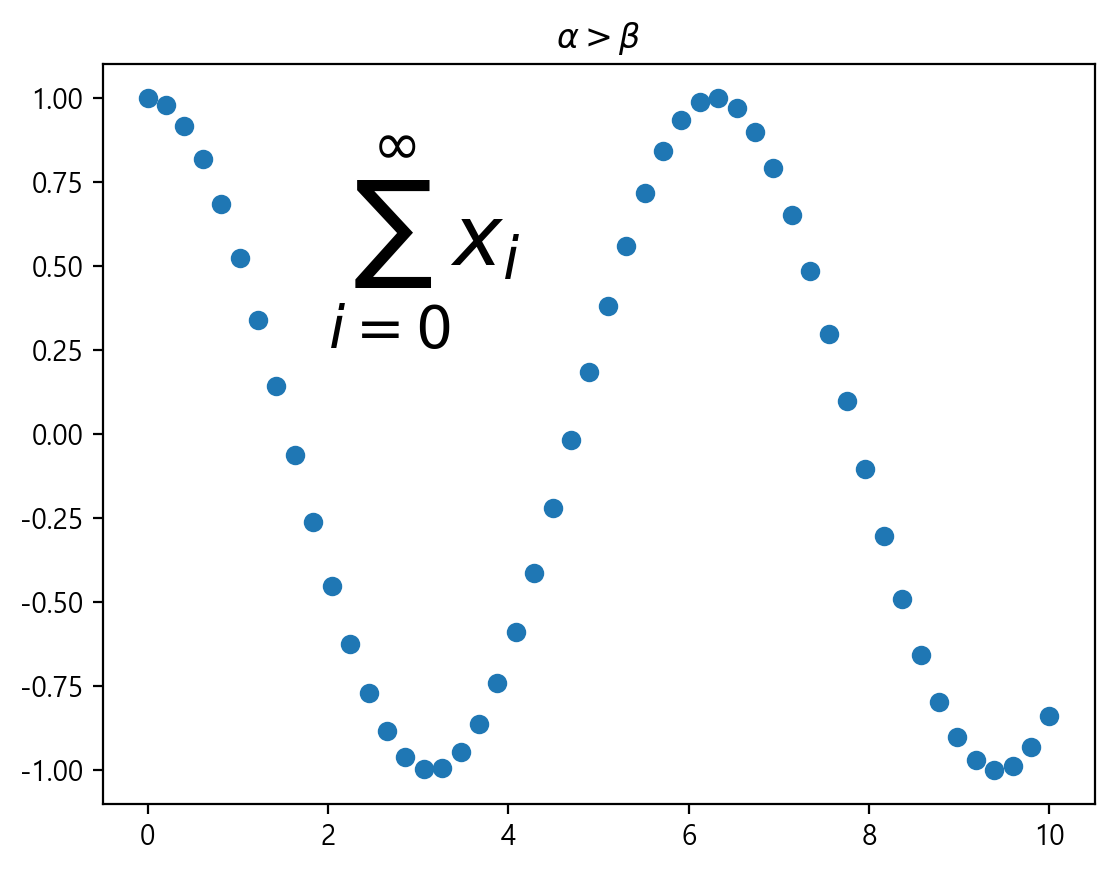

In [109]:
plt.scatter(x, y, marker='o')
plt.title(r'$\alpha > \beta$')
plt.text(2, 0.5, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.show()

### 4) 축과 눈금

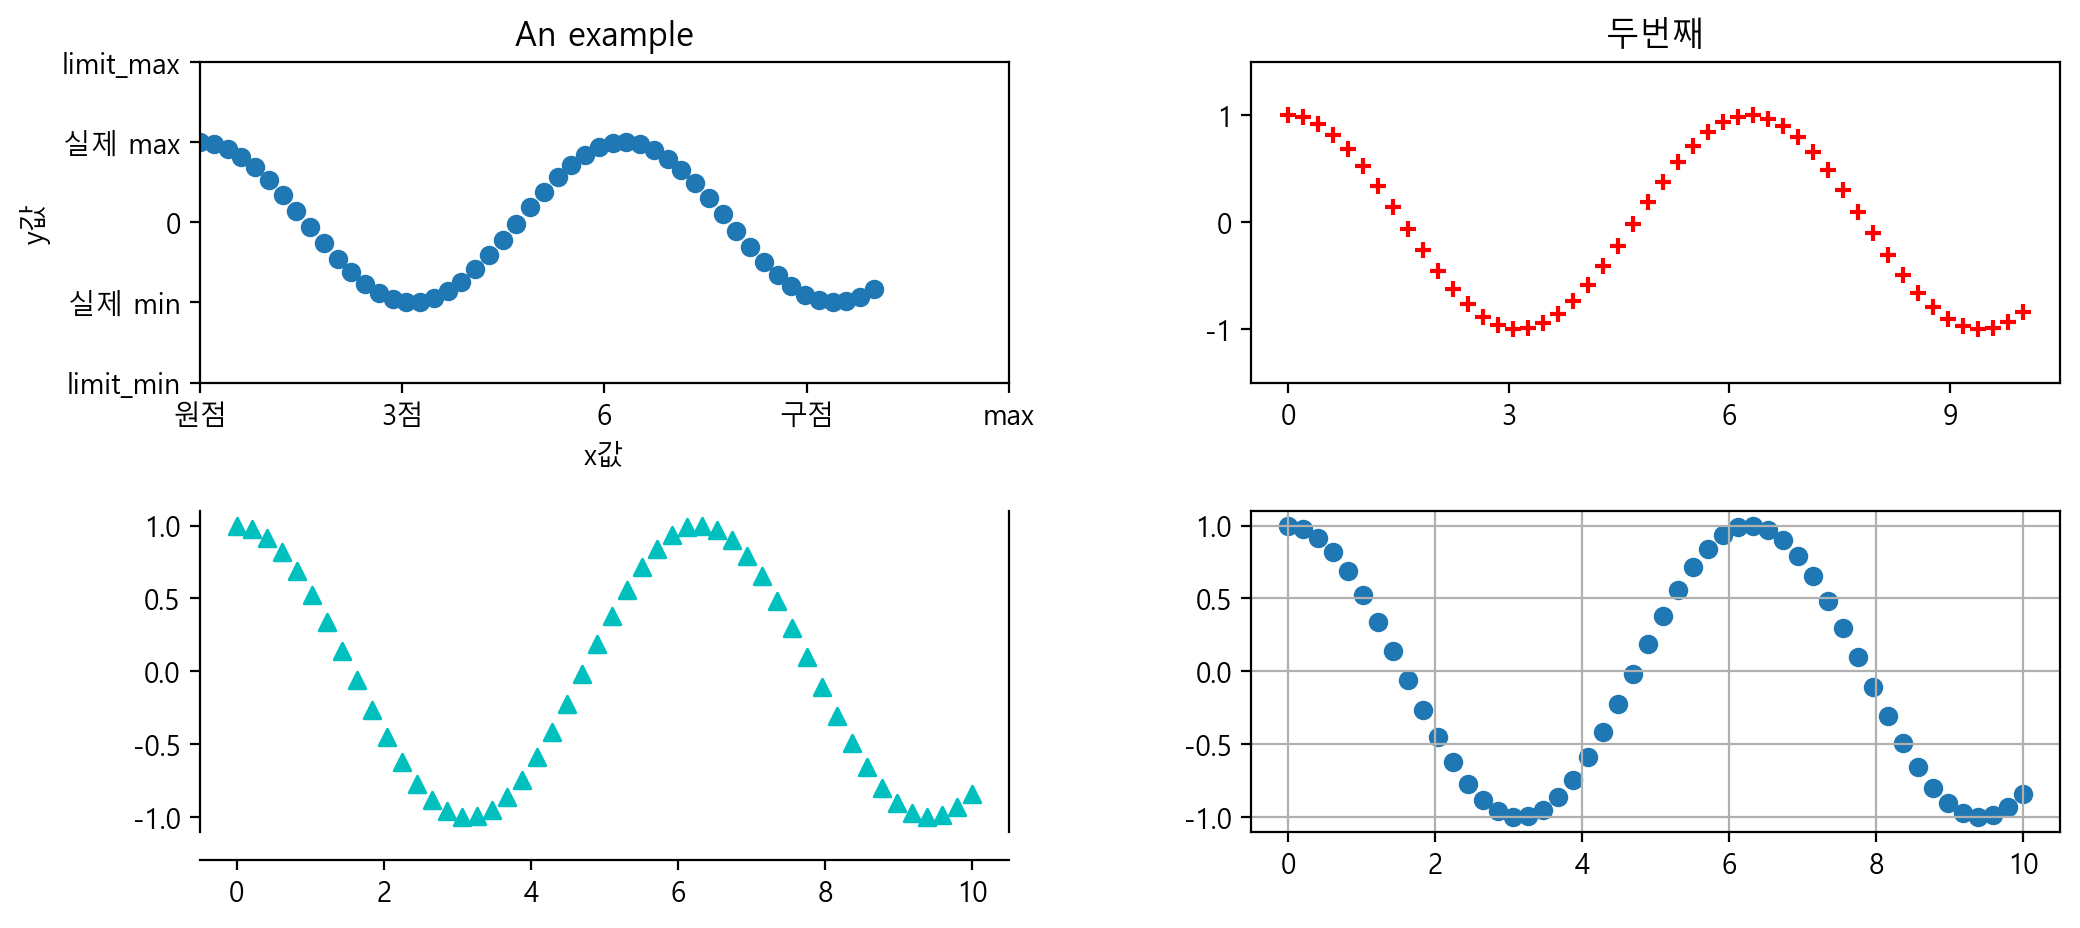

In [135]:
x = np.linspace(0, 10) # 0 부터 10까지 일정한 가격의 50개 값을 배영
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))
# subplot들 끼리의 여백 조정
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace 위아래 여백 wspace 좌우 여백
axes[0,0].scatter(x, y)
axes[0,0].set(title='An example', ylabel='y값', xlabel='x값', 
              xlim=[0, 12], # x축 눈금의 범위
              ylim=[-2,2], # y축 눈금의 범위
              xticks=[0,3,6,9,12], # x축 눈금
              xticklabels = ['원점' ,'3점' ,6 ,'구점', 'max'], # x축 눈금 라벨
              yticks=[-2, -1, 0, 1, 2],
              yticklabels = ['limit_min', '실제 min', 0, '실제 max', 'limit_max' ]
             )
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_title('두번째')
axes[0,1].set_xticks(range(0,11,3)) 
axes[0,1].set_ylim(-1.5,1.5)
axes[1,0].scatter(x, y, color='c', marker='^')
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position( ('outward', 10))
axes[1,1].scatter(x, y)
axes[1,1].grid(True)
plt.show()

### 5) 축공유 ★

In [137]:
x = np.arange(0, 10)
y1 = 0.5*x**2
y2 = -y1

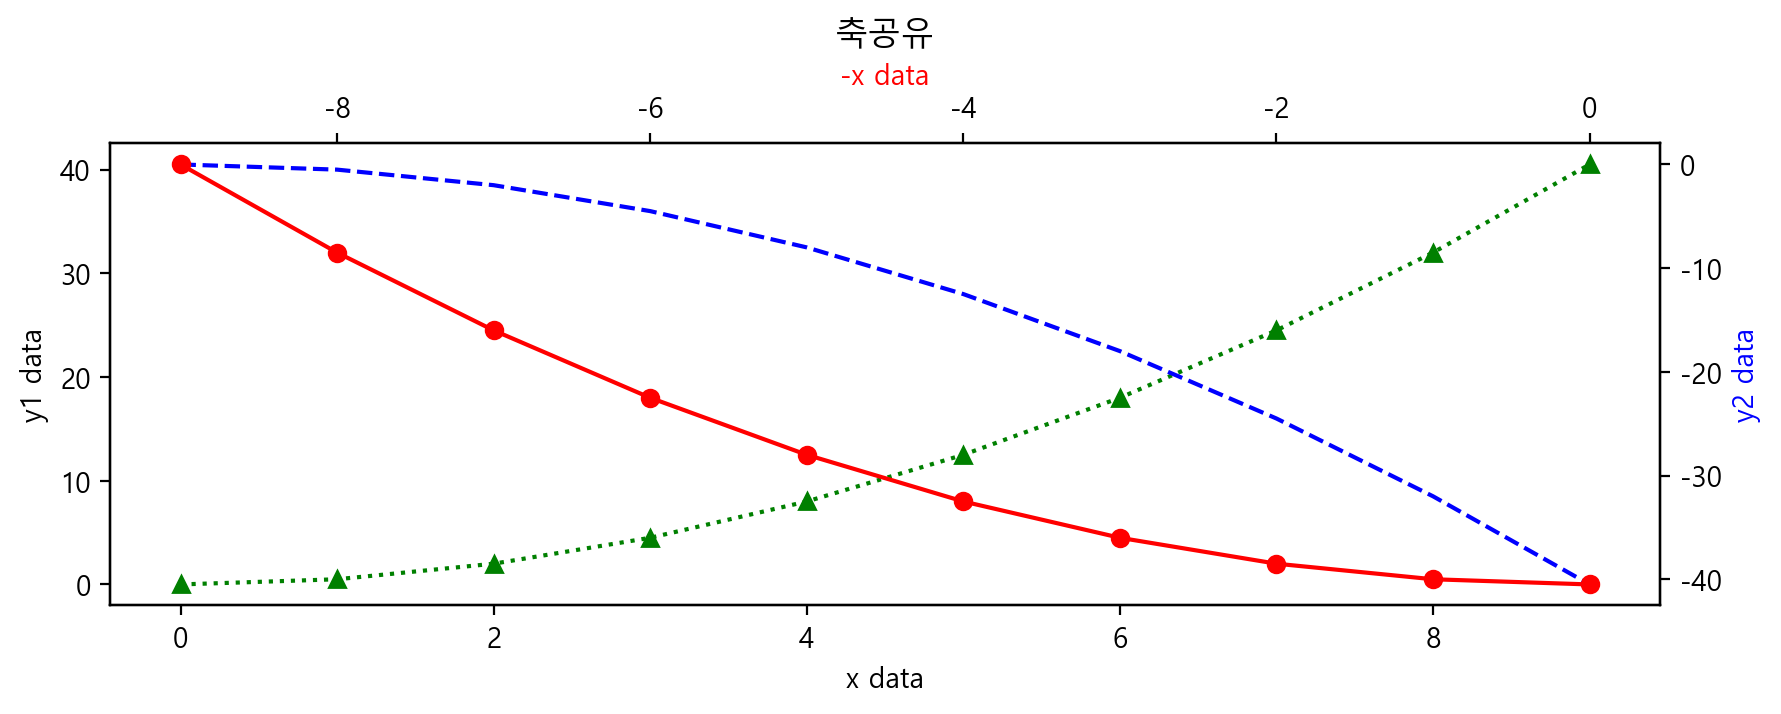

In [155]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel='x data', ylabel='y1 data')
ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x ,y1, 'ro-')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 6) 범례 표시
### 7) plot 스타일 지정  (plt.rc())
- 플롯 스타일 지정시 플롯의 기존 설정값이 초기화<br>
    plt.rc('font', family='Malgun Gothic') # 윈도우즈 <br>
    plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

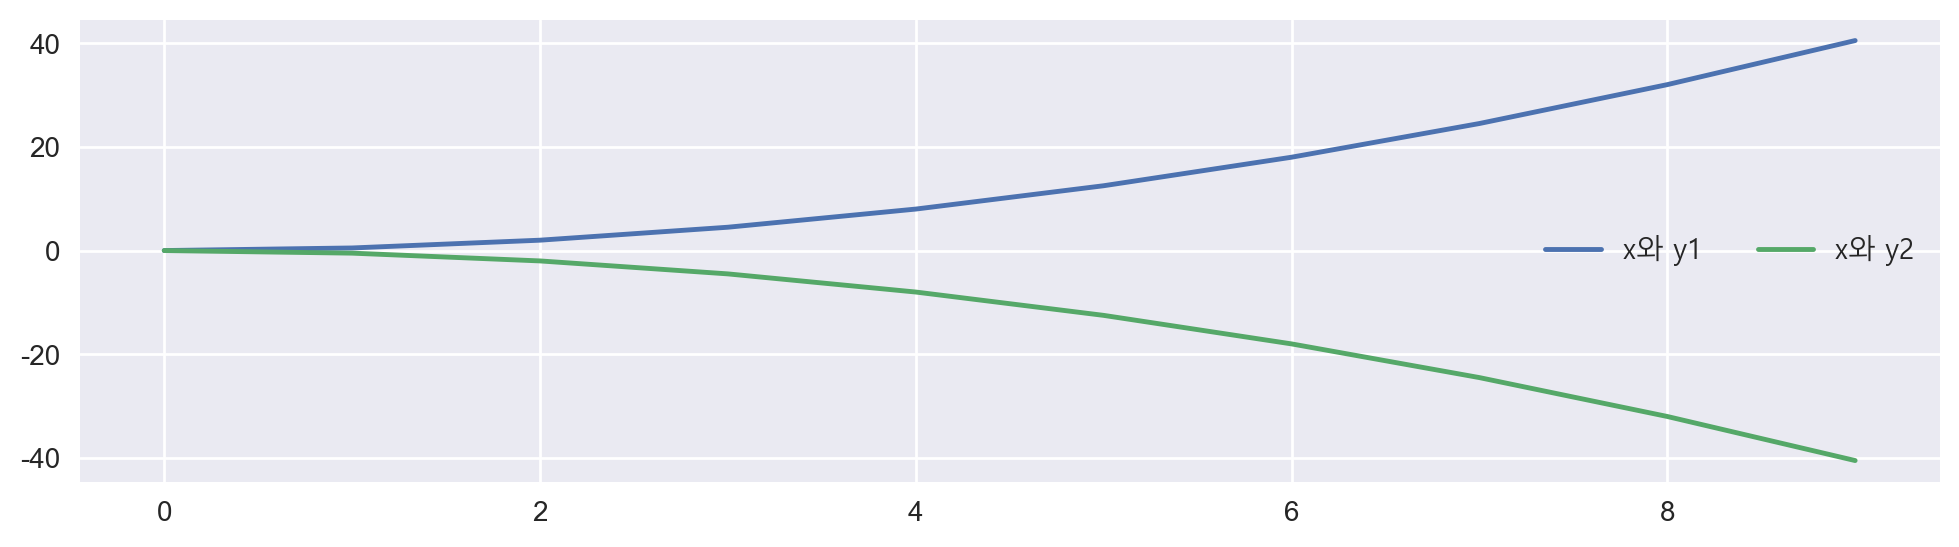

In [167]:
fig, ax = plt.subplots(figsize=(12,3))
plt.style.use('ggplot') # default, ggplot, seaborn, classic
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
ax.plot(x, y1, label='x와 y1')
ax.plot(x, y2, label='x와 y2')
plt.legend(loc='center right', ncol=2, bbox_to_anchor=(1, 0.5))
plt.show()